In [1]:
import pandas as pd
import math
import random
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from sklearn.preprocessing import MinMaxScaler

from GA.CNN import CNN
from function_modules.adaptive_landscape_module import *

In [3]:
cnn = CNN('../../Models/CNN_6_1_2.keras')
num_sequences = 100
x_points = 100
y_points = 100

c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Instructions for updating:
Use tf.identity with explicit device placement instead.


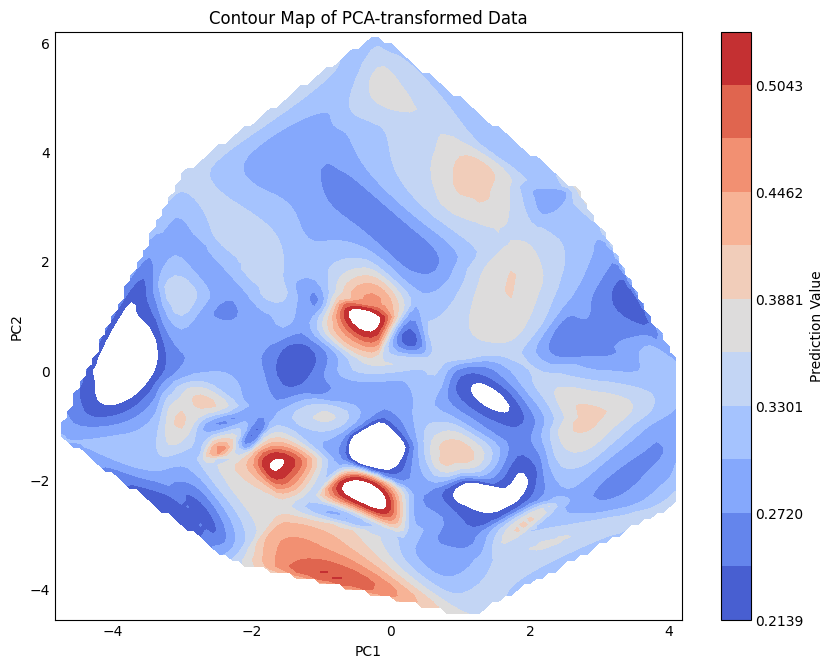

In [ ]:
# pLac -35, spacer, -10
masked_sequence = cnn.one_hot_sequence('AATACTAGAGGTCTTCCGACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTGTGGGCGGGAAGACAACTAGGGG')
mask_indices = [i for i, element in enumerate(masked_sequence) if all(math.isclose(e, 0.25, rel_tol=1e-9) for e in element)]

df = pd.DataFrame()
df['sequence'] = generate_population(n=num_sequences, masked_sequence=masked_sequence, mask_indices=mask_indices)
df['prediction'] = cnn.predict(df['sequence'])

pca_df = append_pca(df)
plot_PCA_contour(pca_df, x_points=x_points, y_points=y_points)

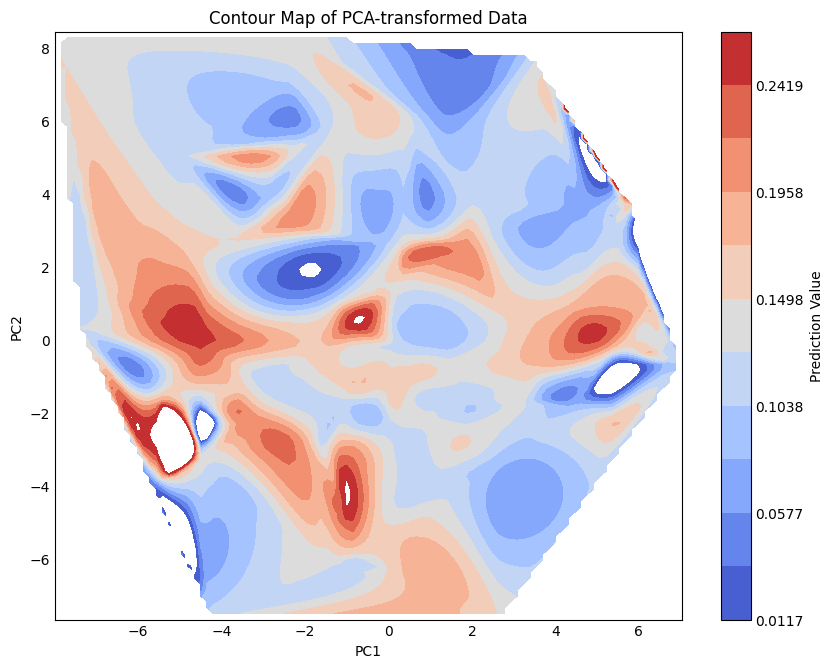

In [ ]:
# Blank promoter sequence
masked_sequence = cnn.one_hot_sequence('N' * 150)
mask_indices = [i for i, element in enumerate(masked_sequence) if all(math.isclose(e, 0.25, rel_tol=1e-9) for e in element)]

df = pd.DataFrame()
df['sequence'] = generate_population(n=num_sequences, masked_sequence=masked_sequence, mask_indices=mask_indices)
df['prediction'] = cnn.predict(df['sequence'])

pca_df = append_pca(df)
plot_PCA_contour(pca_df, x_points=x_points, y_points=y_points)

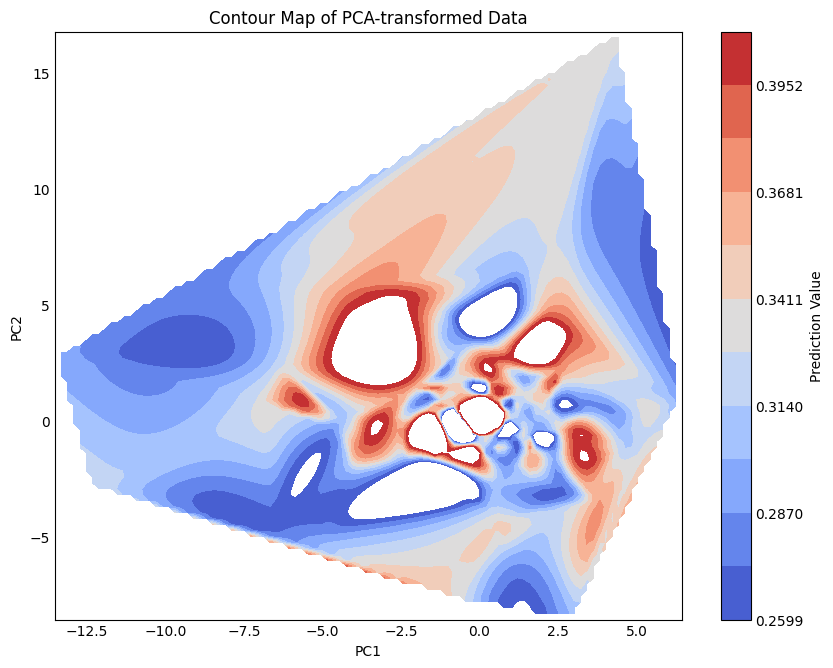

In [ ]:
# Change random elements in the pLac promoter
pLac = 'AATACTAGAGGTCTTCCGACTTTACACTTTATGCTTCCGGCTCGTATGTTGTGTGGGCGGGAAGACAACTAGGGG'
encoded_pLac = cnn.one_hot_sequence(pLac)

masked_sequences = []
for i in range(num_sequences):
    masked_sequence = list(encoded_pLac)
    mask_indices = random.sample(range(len(masked_sequence)), 12)
    for index in mask_indices:
        masked_sequence[index] = generate_nucleotide()
    masked_sequences.append(masked_sequence)

df = pd.DataFrame()
df['sequence'] = masked_sequences
df['prediction'] = cnn.predict(df['sequence'])

pca_df = append_pca(df)
plot_PCA_contour(pca_df, x_points=x_points, y_points=y_points)

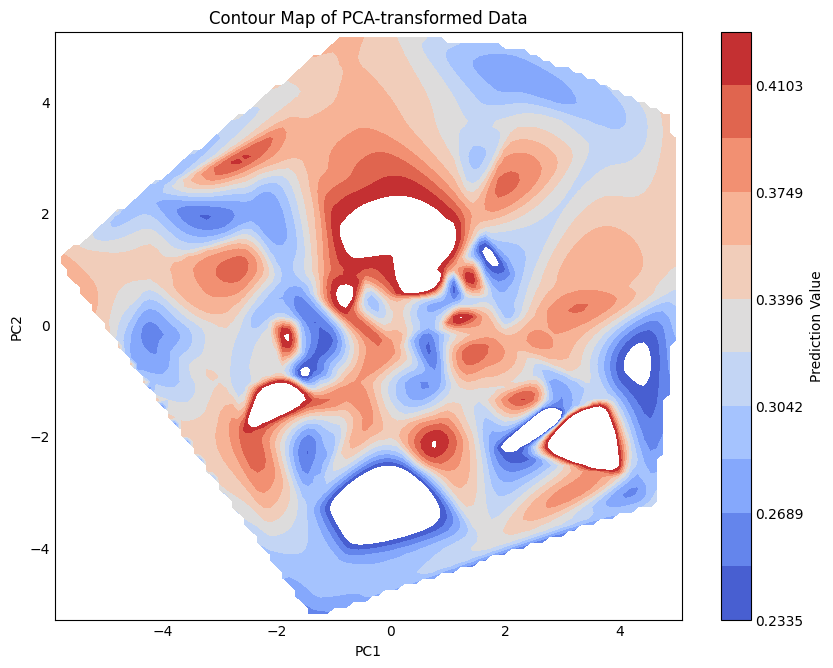

In [ ]:
# Change random elements in the pLac -35, spacer, and -10 elements (pLac_change)

pLac_up = 'AATACTAGAGGTCTTCCGAC'
pLac_change = 'TTTACACTTTATGCTTCCGGCTCGTATGTT'
pLac_down = 'GTGTGGGCGGGAAGACAACTAGGGG'

masked_sequences = []
possible_nucleotides = ['A', 'C', 'G', 'T']

for i in range(num_sequences):
    temp_pLac_change = list(pLac_change)
    mask_indices = random.sample(range(len(pLac_change)), 12)
    for index in mask_indices:
        temp_pLac_change[index] = random.choice(possible_nucleotides)
    new_sequence = pLac_up + "".join(temp_pLac_change) + pLac_down
    masked_sequences.append(cnn.one_hot_sequence(new_sequence))

# Create dataframe and predict
df = pd.DataFrame()
df['sequence'] = masked_sequences
df['prediction'] = cnn.predict(df['sequence'])

# Apply PCA and plot
pca_df = append_pca(df)
plot_PCA_contour(pca_df, x_points=x_points, y_points=y_points)

### PCA for real data
---

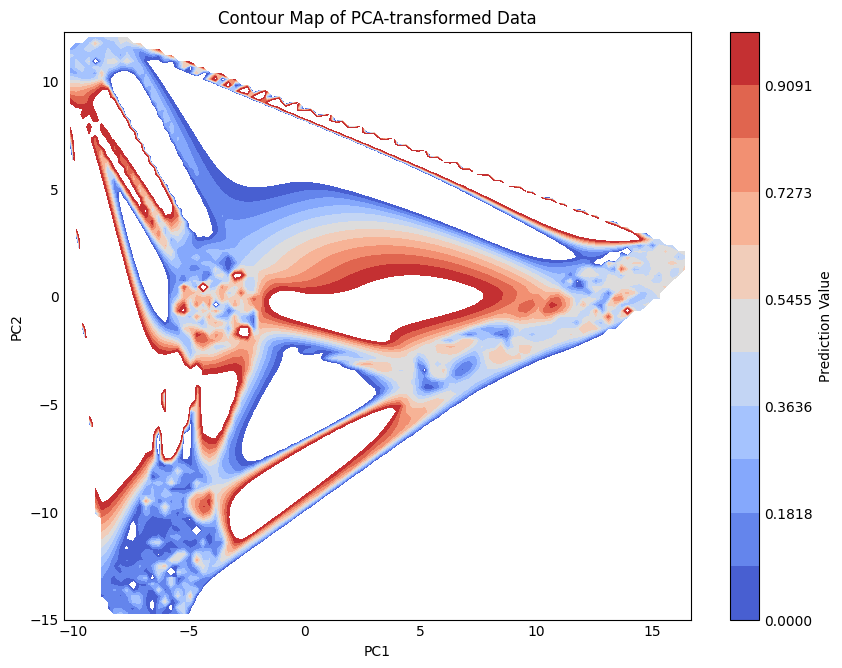

In [ ]:
# PCA for LaFleur_supp data
file_path = '../../Data/Combined/LaFleur_supp.csv'
df = pd.read_csv(file_path)[['Promoter Sequence', 'Observed log(TX/Txref)']]

# Sample sequences
df = df.sample(n=4000, random_state=0)
df.reset_index(drop=True, inplace=True)

# Preprocess the data
df['Promoter Sequence'] = df['Promoter Sequence'].apply(lambda x: x.upper())
df['sequence'] = df['Promoter Sequence'].apply(lambda x: cnn.one_hot_sequence(x))
df['prediction'] = MinMaxScaler().fit_transform(df[['Observed log(TX/Txref)']].abs())

pca_df = append_pca(df)
plot_PCA_contour(pca_df, x_points=x_points, y_points=y_points)

Length: 139


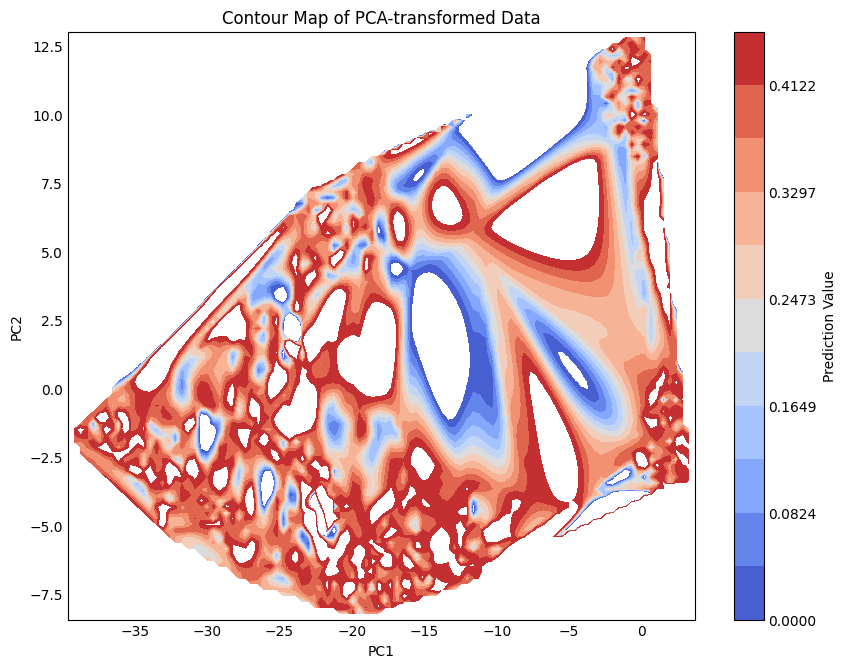

Length: 150


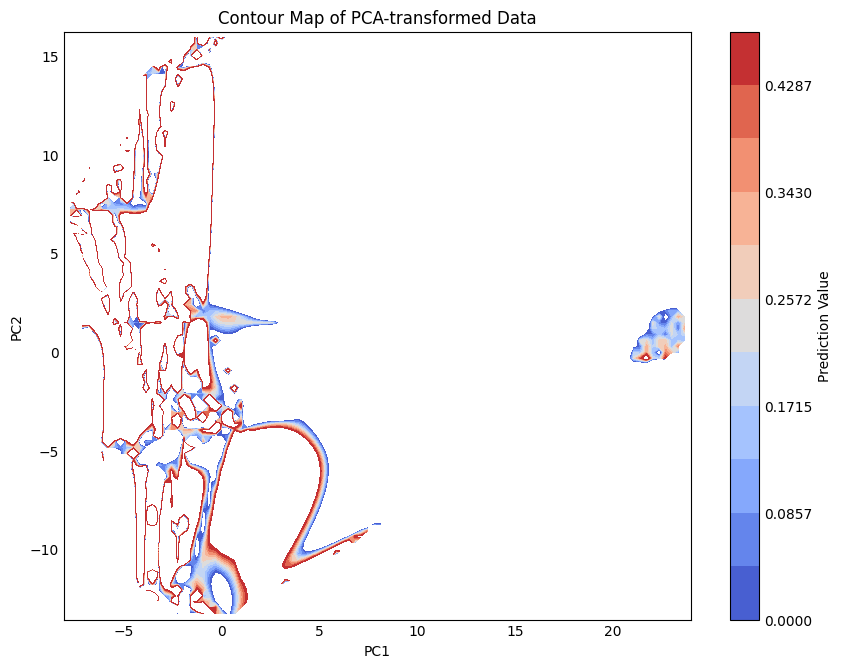

Length: 116


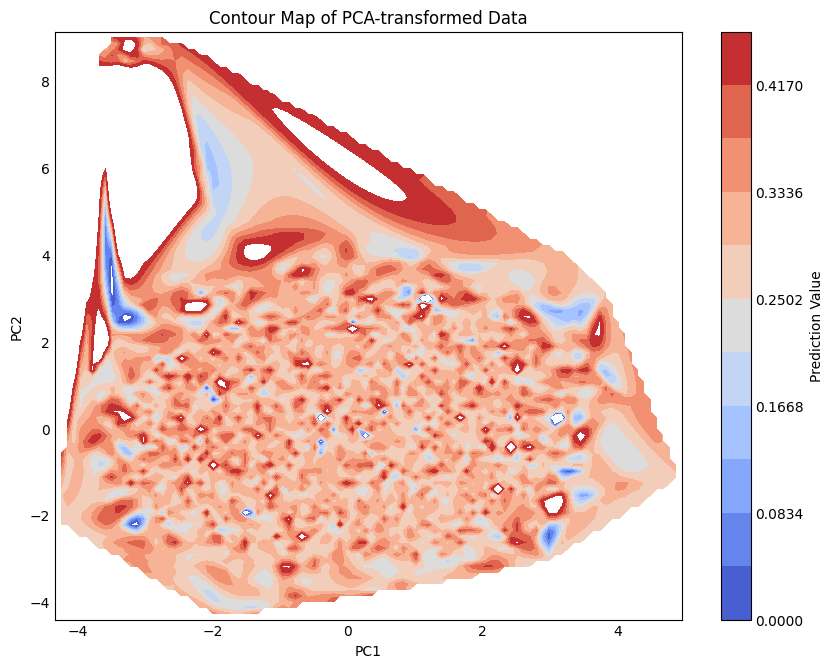

Length: 78


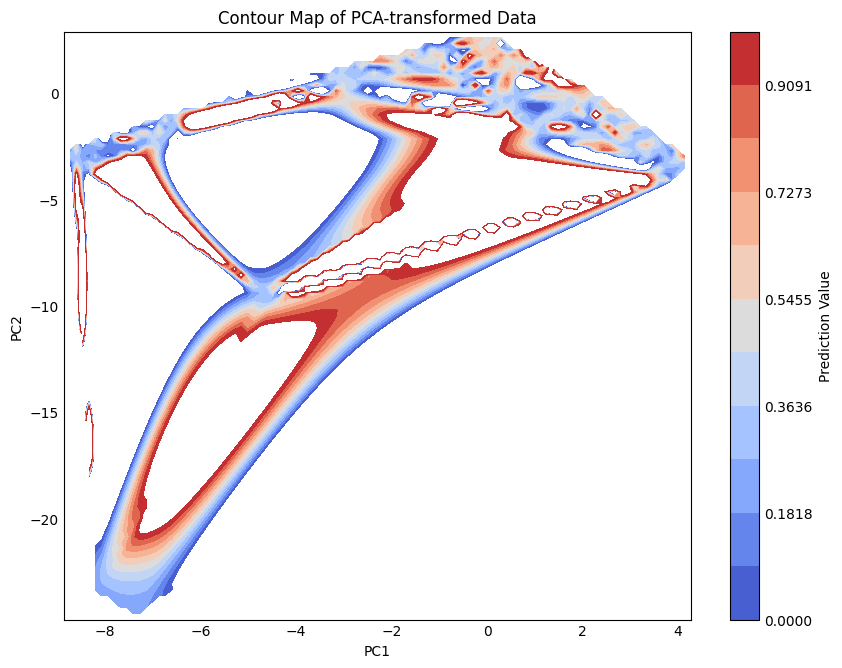

Length: 73


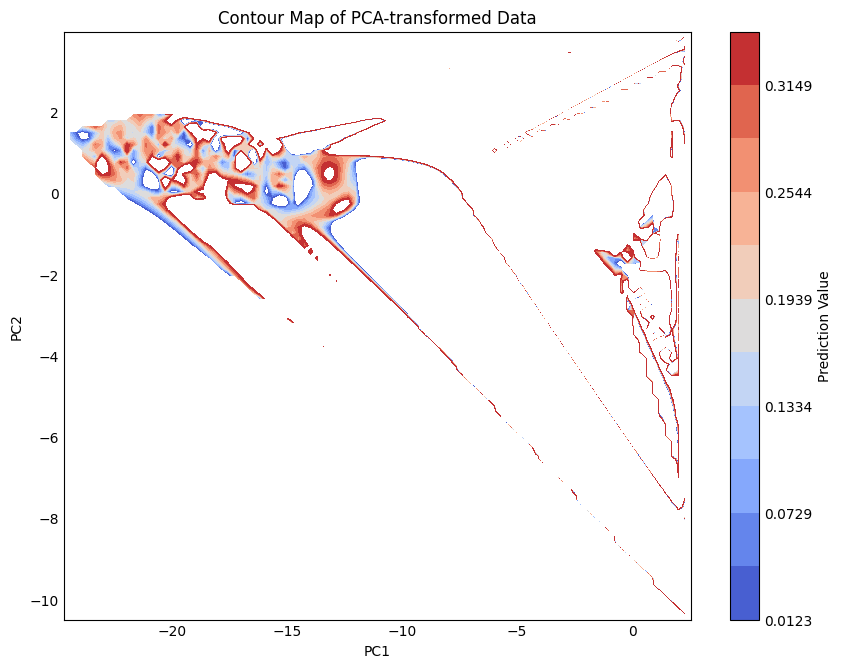

Length: 79


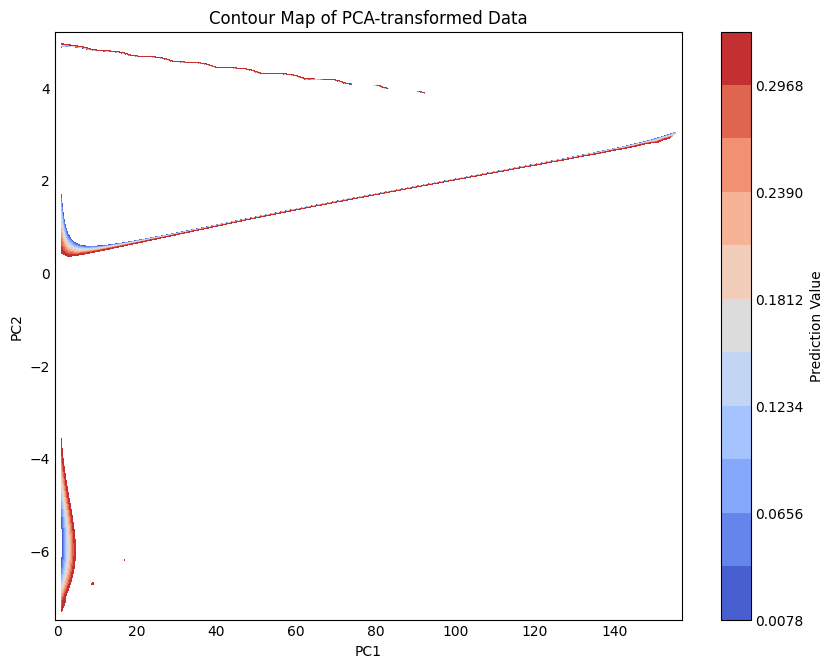

Length: 72


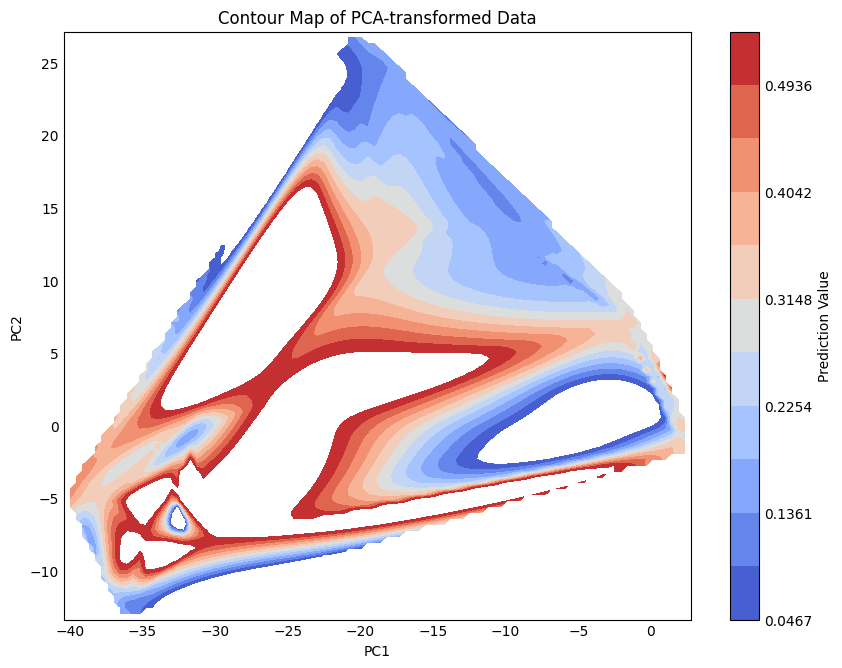

Length: 77


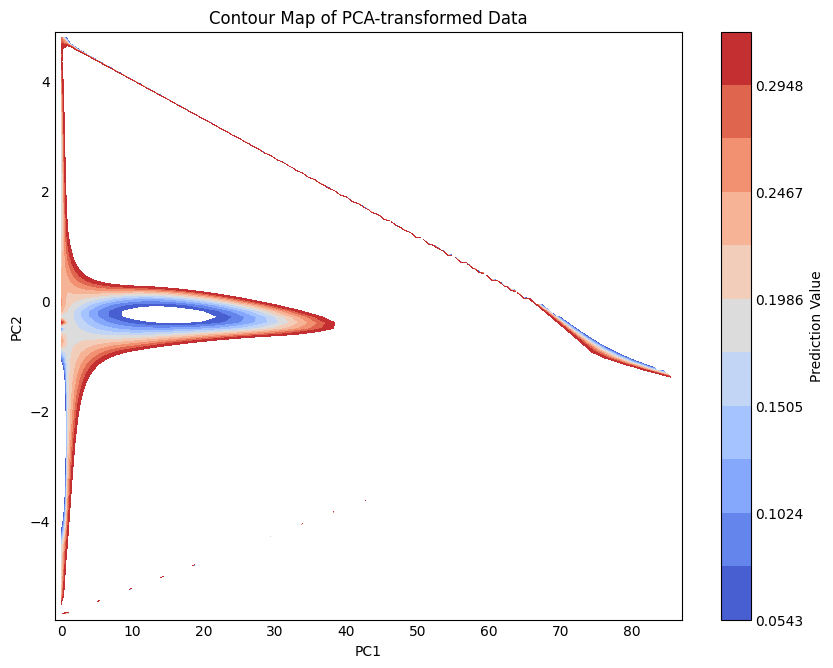

Length: 74


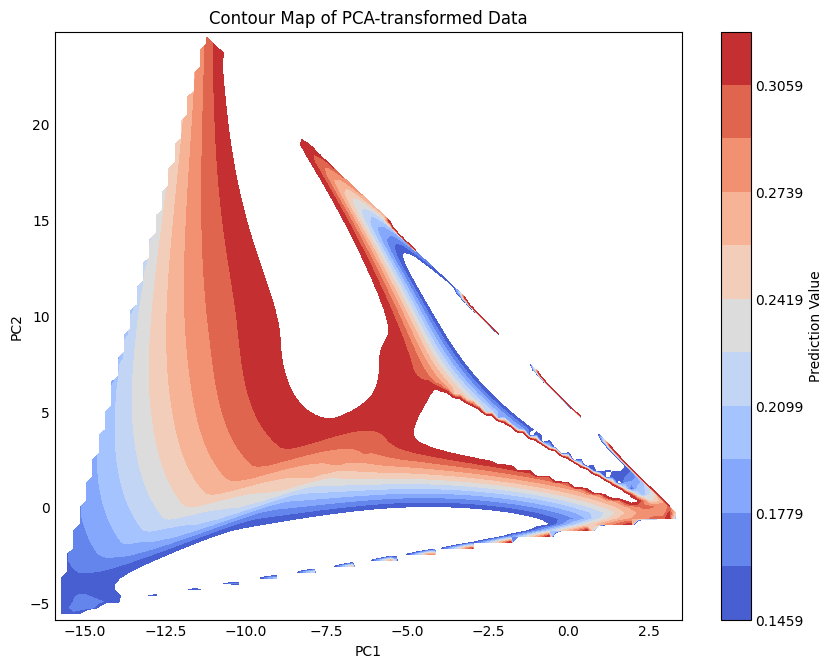

Length: 71


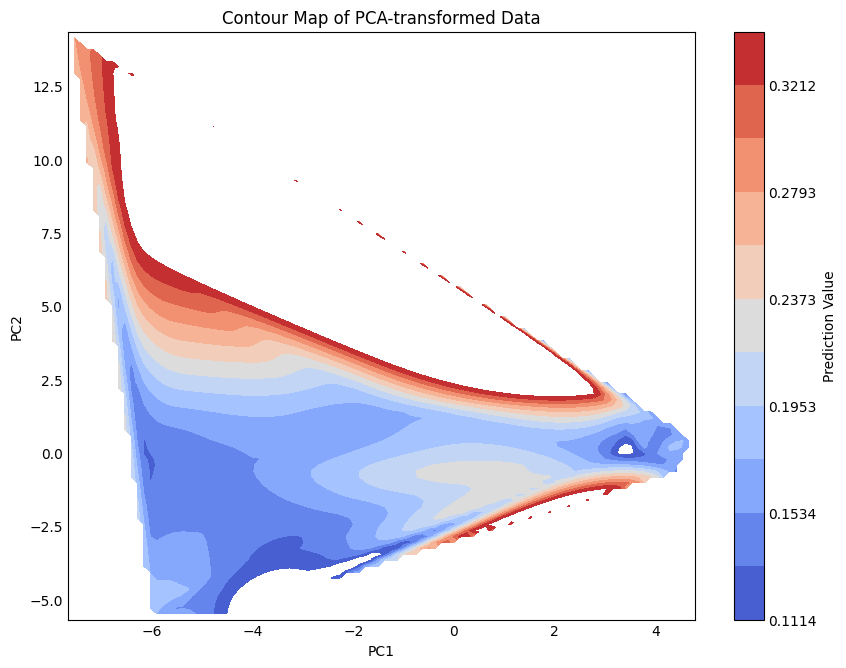

In [ ]:
# Make a plot for each length of promoter sequence in the LaFleur_supp data

file_path = '../../Data/Combined/LaFleur_supp.csv'
df = pd.read_csv(file_path)[['Promoter Sequence', 'Observed log(TX/Txref)']]
df['Promoter Sequence'] = df['Promoter Sequence'].apply(lambda x: x.upper())
df['sequence'] = df['Promoter Sequence'].apply(lambda x: cnn.one_hot_sequence(x))
df['prediction'] = MinMaxScaler().fit_transform(df[['Observed log(TX/Txref)']].abs())

most_common_lengths = df['Promoter Sequence'].apply(len).value_counts().head(10)

for length, count in most_common_lengths.items():
    print(f'Length: {length}')
    filtered_df = df[df['Promoter Sequence'].apply(len) == length]
    filtered_df.reset_index(drop=True, inplace=True)

    pca_df = append_pca(filtered_df)
    plot_PCA_contour(pca_df, x_points=x_points, y_points=y_points)


### PCA for real forward/reverse data
---

In [5]:
x_points = 300
y_points = 300

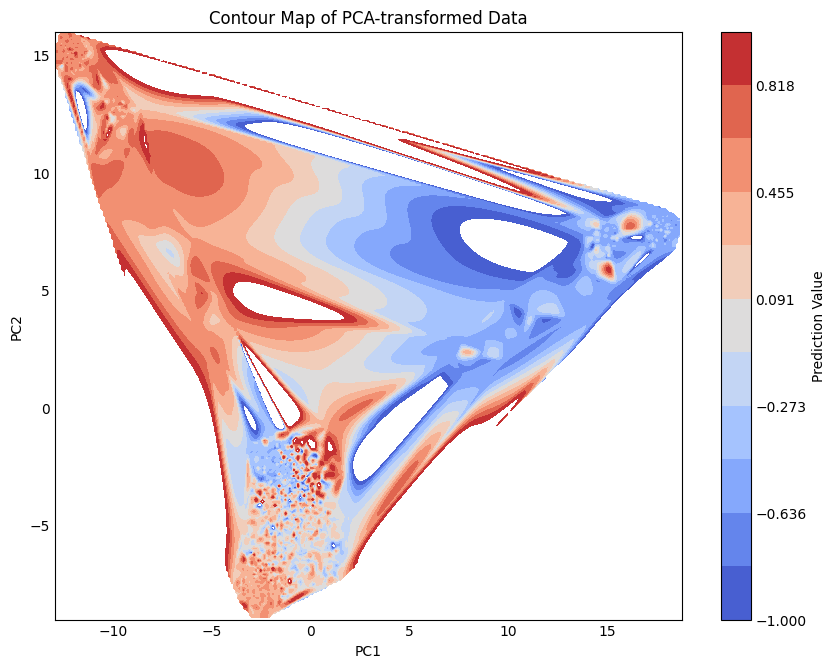

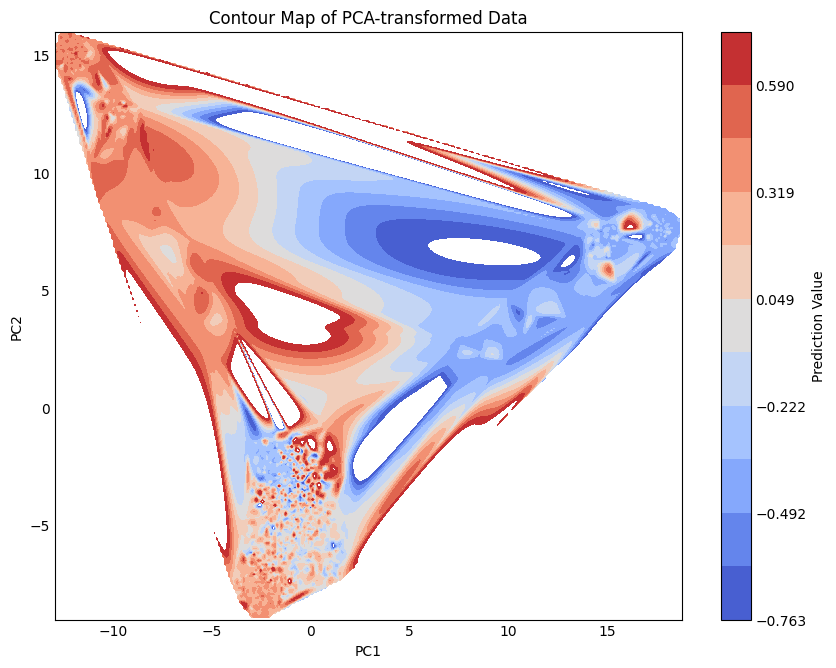

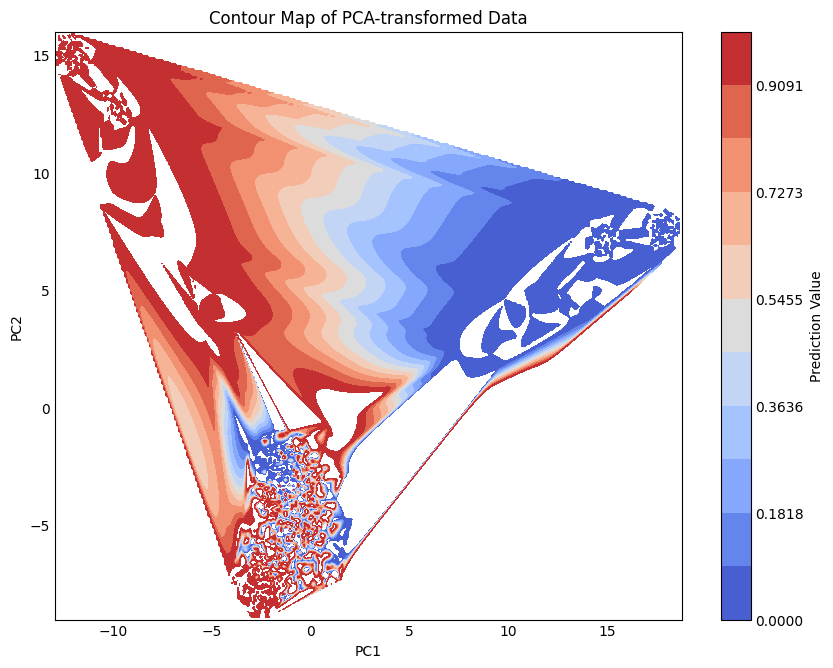

In [6]:
# PCA for LaFleur_supp forward/reverse data
file_path = '../../Data/Augmented/reverse_LaFleur_supp.csv'
df = pd.read_csv(file_path)

# Sample sequences
df = df.sample(n=4000, random_state=0)
df.reset_index(drop=True, inplace=True)

# Preprocess the data
df['Promoter Sequence'] = df['Promoter Sequence'].apply(lambda x: x.upper())
df['sequence'] = df['Promoter Sequence'].apply(lambda x: cnn.one_hot_sequence(x))

# Real Data
df['prediction'] = (MinMaxScaler().fit_transform(df[['Augmented Observed log(TX/Txref)']] * -1) * 2) - 1
pca_df = append_pca(df)
plot_PCA_contour(pca_df, x_points=x_points, y_points=y_points)

# Predict with the bidirectional CNN
bidir_cnn = CNN('../../Models/CNN_7_0.keras')
df['prediction'] = bidir_cnn.predict(df['sequence'])
pca_df = append_pca(df)
plot_PCA_contour(pca_df, x_points=x_points, y_points=y_points)

# Predict with boolean CNN
boolean_cnn = CNN('../../Models/CNN_7_1.keras')
df['prediction'] = boolean_cnn.predict(df['sequence'])
pca_df = append_pca(df)
plot_PCA_contour(pca_df, x_points=x_points, y_points=y_points)
